<a href="https://colab.research.google.com/github/himanshuarora1703/codebasics-ML-exercise/blob/main/Decision%20Trees/Decision_tree_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# remove columns that are not necessary

df.drop(columns=df.columns[[0,3,8,10]],inplace=True)

In [5]:
#info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
# check for missing values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Fill up missing values in the age and the embarked column.

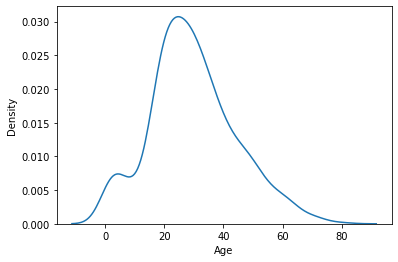

In [7]:
# check the distribution of the age column
sns.kdeplot(df['Age'])

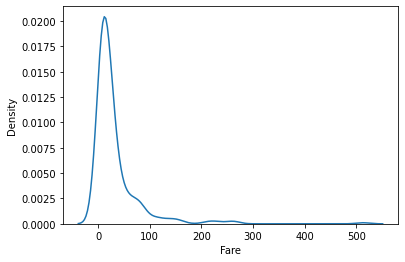

In [9]:
# check the distribution of fare
sns.kdeplot(df['Fare'])

The fare column is right skewed and it seems that it contains outliers

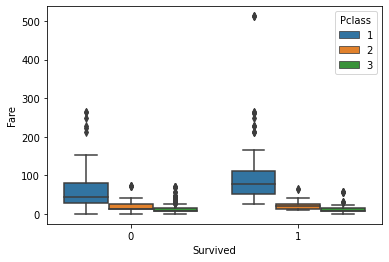

In [18]:
# check for outliers in the fare column

sns.boxplot(x='Survived',y='Fare',data=df,hue='Pclass')

In [22]:
! pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 21.9 MB/s eta 0:00:00


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
from feature_engine.outliers import Winsorizer

In [20]:
# create a new column called as family

df['Family'] = df['SibSp'] + df['Parch']

In [26]:
# drop the redundant columns

df.drop(columns=['SibSp','Parch'],inplace=True)

In [39]:
# make X and y
X = df.drop(columns='Survived')
y = df['Survived']

In [40]:
# do train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
148,2,male,36.5,26.0000,S,2
685,2,male,25.0,41.5792,C,3
114,3,female,17.0,14.4583,C,0
389,2,female,17.0,12.0000,C,0
441,3,male,20.0,9.5000,S,0


In [32]:
from sklearn import set_config
set_config(display='diagram')

In [34]:
# do the tansformations

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

age_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

fare_pipe = Pipeline(steps=[
    ('outlier',Winsorizer(capping_method='iqr',fold=1.5)),
    ('scale',StandardScaler())
])

embark_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))
])

transformer = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse=False),['Sex']),
    ('age',age_pipe,['Age']),
    ('fare',fare_pipe,['Fare']),
    ('embarked',embark_pipe,["Embarked"])
],remainder='passthrough')

In [36]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Sex']),
                                ('age',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age']),
                                ('fare',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5)),
                                                 ('scale', StandardScaler())]),
                                 ['Fare']),
                                ('embarked',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Embarked'])])

In [35]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans = transformer.transform(X_test)

In [37]:
# model pipeline

dt = DecisionTreeClassifier()
model = Pipeline(steps=[
    ('trans',transformer),
    ('model',dt)
])

In [38]:
model

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex']),
                                                 ('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('model', DecisionTreeClassifier())])

In [42]:
# fit the model

model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [43]:
# check the accuracy score

print("the train score is",accuracy_score(y_train,y_pred_train))
print('The test score is',accuracy_score(y_test,y_pred_test))

the train score is 0.9845505617977528
The test score is 0.7094972067039106


In [46]:
# check the cross val score

from sklearn.model_selection import cross_val_score,GridSearchCV

score = cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('the mean score is',np.mean(score))

the mean score is 0.7778776529338327


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


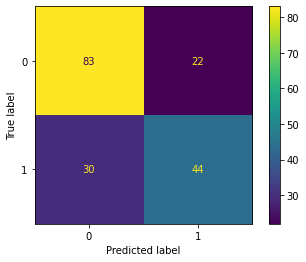

In [47]:
# plot a confusion matrix

plot_confusion_matrix(model,X_test,y_test)

In [52]:
model.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype=object)

In [53]:
# do hyperparameter tuning

params = {'model__criterion':['gini','entropy'],
          'model__max_depth':[3,4,5,6],
          'model__max_leaf_nodes':[3,4,5,6,7,8,9]
}

search = GridSearchCV(model,params,cv=5,scoring='accuracy',verbose=1)

search.fit(X_train,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Sex']),
                                                                        ('age',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('fare',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5)),
                                                                                         (...
                                                                        ('embarked',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Embarked'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=1)

In [60]:
pd.DataFrame(search.cv_results_).sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.016166,0.001093,0.007606,0.000149,entropy,4,8,"{'model__criterion': 'entropy', 'model__max_de...",0.818182,0.797203,0.802817,0.852113,0.845070,0.823077,0.022049,1
54,0.016956,0.001151,0.007824,0.000265,entropy,6,8,"{'model__criterion': 'entropy', 'model__max_de...",0.818182,0.797203,0.802817,0.852113,0.838028,0.821668,0.020787,2
47,0.017688,0.001612,0.008088,0.000383,entropy,5,8,"{'model__criterion': 'entropy', 'model__max_de...",0.818182,0.797203,0.802817,0.852113,0.838028,0.821668,0.020787,2
39,0.019894,0.003691,0.009837,0.001183,entropy,4,7,"{'model__criterion': 'entropy', 'model__max_de...",0.818182,0.797203,0.788732,0.852113,0.845070,0.820260,0.025140,4
46,0.019778,0.003861,0.009473,0.001552,entropy,5,7,"{'model__criterion': 'entropy', 'model__max_de...",0.818182,0.797203,0.788732,0.852113,0.845070,0.820260,0.025140,4


In [61]:
search.best_estimator_.

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex']),
                                                 ('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        max_leaf_nodes=8))])

In [62]:
search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 4,
 'model__max_leaf_nodes': 8}

In [63]:
search.best_score_

0.823076923076923

In [64]:
search.estimator

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Sex']),
                                                 ('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('fare',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('model', DecisionTreeClassifier())])

In [68]:
# retrain the model with best estimator

new_model = search.best_estimator_

new_model.fit(X_train,y_train)
y_pred_train = new_model.predict(X_train)
y_pred_test = new_model.predict(X_test)

# check the accuracy score

print("the train score is",accuracy_score(y_train,y_pred_train))
print('The test score is',accuracy_score(y_test,y_pred_test))

# check the cross val score

from sklearn.model_selection import cross_val_score,GridSearchCV

score = cross_val_score(new_model,X,y,cv=10,scoring='accuracy')

print('the mean score is',np.mean(score))

the train score is 0.8286516853932584
The test score is 0.8100558659217877
the mean score is 0.8204369538077405
